In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

file_path = "Iris.csv"
df = pd.read_csv(file_path)


print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: 'Iris.csv'

In [ ]:
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

df["Species"] = df["Species"].astype('category')

X = df.drop(columns=["Species"])  # Numerical features
y = df["Species"]  # Target labels

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Standardized Data Sample:")
print(pd.DataFrame(X_scaled, columns=X.columns).head())


Standardized Data Sample:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      -0.900681      1.032057      -1.341272     -1.312977
1      -1.143017     -0.124958      -1.341272     -1.312977
2      -1.385353      0.337848      -1.398138     -1.312977
3      -1.506521      0.106445      -1.284407     -1.312977
4      -1.021849      1.263460      -1.341272     -1.312977


In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)


Explained Variance Ratio: [0.72770452 0.23030523 0.03683832 0.00515193]


# CUMULATIVE EXPLAINED VARIANCE

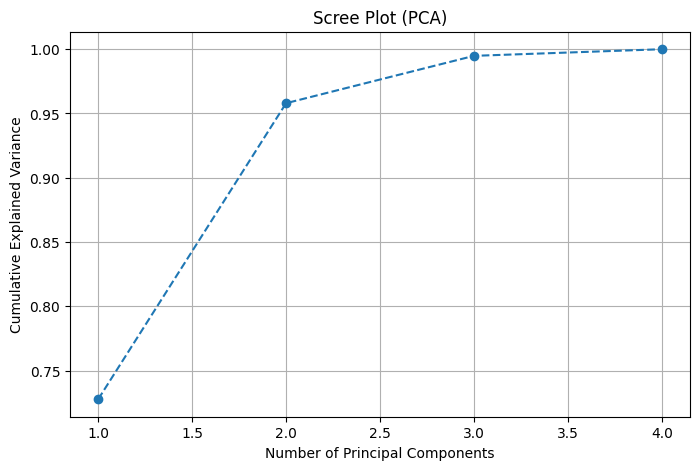

In [ ]:
# plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), linestyle="--", marker="o")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot (PCA)")
plt.grid(True)
plt.show()


# INDIVIDUAL EXPLAINED VARIANCE

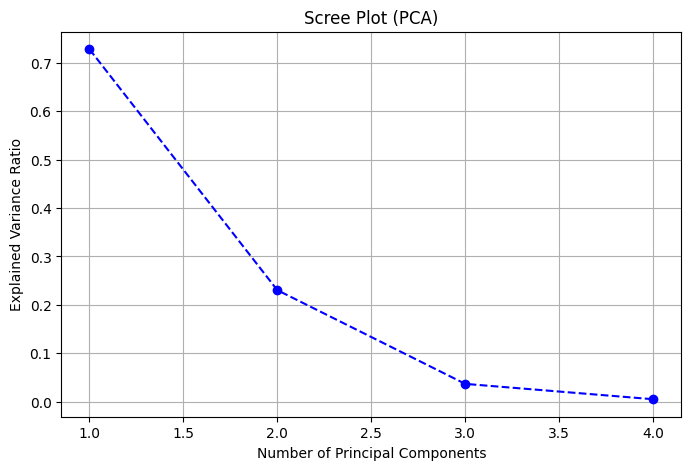

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot (PCA)")
plt.grid(True)
plt.show()


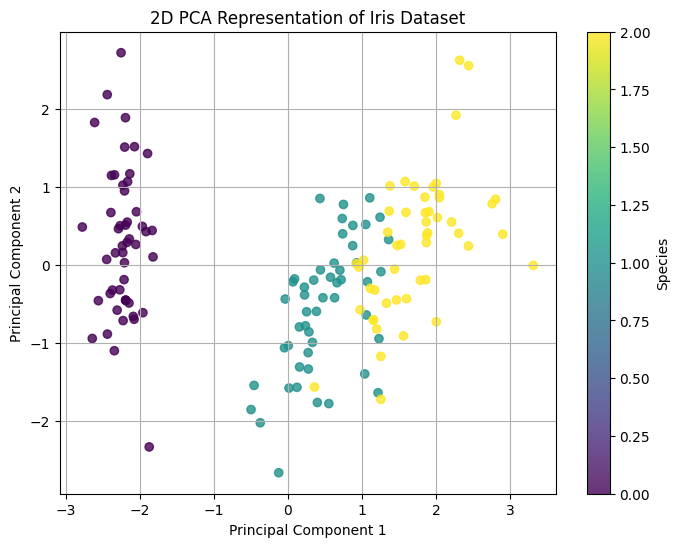

In [ ]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca_2d, columns=["PC1", "PC2"])
df_pca["Species"] = y


plt.figure(figsize=(8,6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], c=df_pca["Species"], cmap='viridis', alpha=0.8)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Representation of Iris Dataset")
plt.colorbar(label="Species")
plt.grid(True)
plt.show()


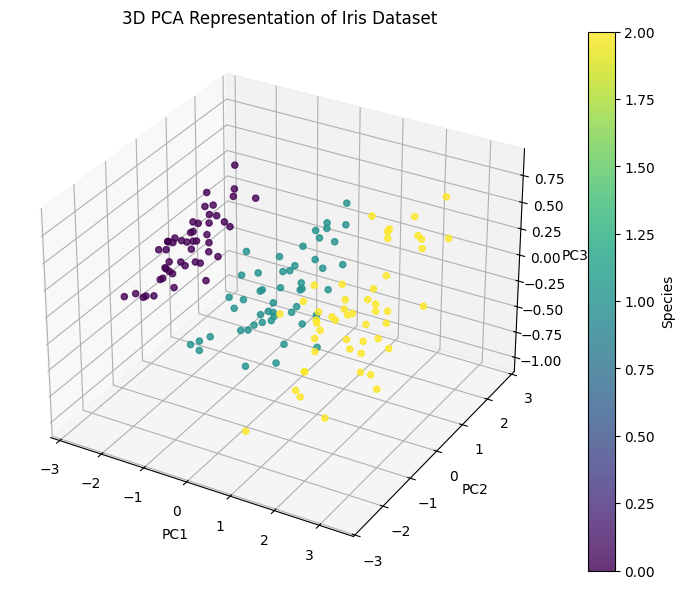

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='viridis', alpha=0.8)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA Representation of Iris Dataset")
plt.colorbar(sc, label="Species")
plt.show()
